### **Chapter 01. 럭키백의 확률**

In [28]:
import pandas as pd

fish = pd.read_csv("Fish.csv")
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [29]:
print(fish.columns)

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')


In [30]:
print(type(fish["Species"]))
print(fish["Species"].shape)    # 1차원 배열!

<class 'pandas.core.series.Series'>
(159,)


In [31]:
# print(type(fish[["Species"]]))
# print(fish[["Species"]].shape)   # 2차원 배열!
# # 다변량 회귀

In [32]:
y = fish["Species"].to_numpy()
print(y.shape)
print(type(y))
print(y[:5])

(159,)
<class 'numpy.ndarray'>
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [33]:
x = fish[['Weight', 'Length2', 'Length3', 'Height', 'Width']].to_numpy()
print(type(x))
print(x[:5])

<class 'numpy.ndarray'>
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

print(x_train.shape, y_train.shape)   # 75%  --> 119마리
print(x_test.shape, y_test.shape)     # 25%  -->  40마리

(119, 5) (119,)
(40, 5) (40,)


In [35]:
print(y_train[:10])

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Perch'
 'Perch']


In [36]:
# Feature Scaling 
# 1) 표준화(Standardization) --> 표준점수(평균, 표준편차) --> 음수~양수
# 2) 정규화(Normalization) --> MinMax 정규화 --> 0~1
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()  # 변환기(Transformer) 클래스

ss.fit(x_train)   # 평균, 표준편차

x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

print(x_train_scaled[:5])
print(x_test_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]
[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


### **Chapter 02. 로지스틱 회귀**

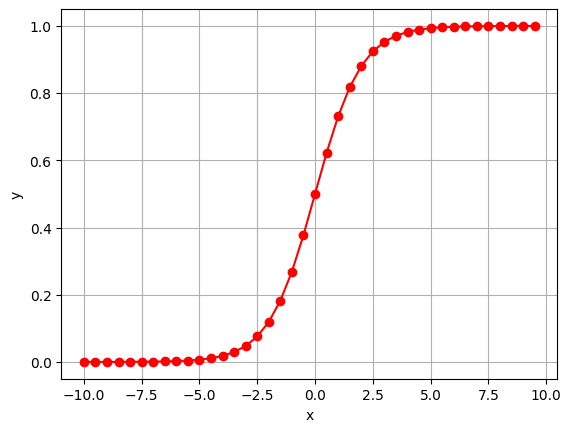

In [37]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.5)
y = 1 / (1 + np.exp(-x))   # exponential

plt.figure()
plt.plot(x, y, color="red", marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [38]:
# 이진 분류 문제
# Two Classess: Bream & Smelt (빙어 & 도미)
# 불리언 인덱싱(Boolean Indexing)

a = np.array(["INTJ", "ENFP", "ISTP", "ENSP"])
b = np.array([True, True, False, False])
print(a)
print(b)

print(a[b])
print(np.sum(b))

['INTJ' 'ENFP' 'ISTP' 'ENSP']
[ True  True False False]
['INTJ' 'ENFP']
2


In [39]:
bream_smelt_index = (y_train == "Bream") | (y_train == "Smelt")

print(np.sum(bream_smelt_index))

x_train_bream_smelt = x_train_scaled[bream_smelt_index]
y_train_bream_smelt = y_train[bream_smelt_index]

print(x_train_bream_smelt.shape, y_train_bream_smelt.shape)

33
(33, 5) (33,)


In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_bream_smelt, y_train_bream_smelt)

LogisticRegression()

In [41]:
print(lr.predict(x_train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [42]:
print(lr.predict_proba(x_train_bream_smelt[:5]))

# 0 ---> 음성 클래스
# 1 ---> 양성 클래스

#  "Bream"(0)   "Smelt"(1)
# [[0.99760007 0.00239993]   # 샘플 1
#  [0.02737325 0.97262675]   # 샘플 2
#  [0.99486386 0.00513614]
#  [0.98585047 0.01414953]
#  [0.99767419 0.00232581]]

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [43]:
print(lr.classes_)

['Bream' 'Smelt']


In [44]:
# z = a * weight + b * length2 + c * length3 + ....
print("계수:", lr.coef_)
print("절편:", lr.intercept_)

계수: [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]]
절편: [-2.16172774]


In [45]:
decision = lr.decision_function(x_train_bream_smelt[:5])
print(decision)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [46]:
# science python --> scipy
from scipy.special import expit   # 시그모이드 함수

#  "Bream"(0)   "Smelt"(1)
# [[0.99760007 0.00239993]   # 샘플 1
#  [0.02737325 0.97262675]   # 샘플 2
#  [0.99486386 0.00513614]
#  [0.98585047 0.01414953]
#  [0.99767419 0.00232581]]

print(expit(decision))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [47]:
print(lr.max_iter)
print(lr.C)

100
1.0


In [48]:
# 다중 분류 문제
# Seven Classess

lr = LogisticRegression(max_iter=1000, C=20)

lr.fit(x_train_scaled, y_train)

print("학습용:", lr.score(x_train_scaled, y_train))  # 정확도 (Accuracy)
print("시험용:", lr.score(x_test_scaled, y_test))

학습용: 0.9327731092436975
시험용: 0.925


In [49]:
print(lr.predict(x_train_scaled[:5]))

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki']


In [50]:
# np.round(decimals=) <-- 반올림
# np.ceil(decimals=)  <-- 올림
# np.floor(decimals=) <-- 버림

print(np.round(lr.predict_proba(x_train_scaled[:5]), decimals=3))

[[0.998 0.001 0.    0.    0.    0.    0.002]
 [0.    0.    0.001 0.999 0.    0.    0.   ]
 [0.    0.002 0.051 0.    0.006 0.941 0.   ]
 [0.    0.001 0.861 0.001 0.134 0.    0.004]
 [0.009 0.783 0.007 0.    0.188 0.    0.014]]


In [51]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [52]:
print(lr.coef_.shape)
print(lr.intercept_.shape)

(7, 5)
(7,)


In [53]:
decision = lr.decision_function(x_train_scaled[:5])
print(np.round(decision, decimals=3))

[[ 13.056   5.65   -3.369  -3.353   2.166 -20.802   6.652]
 [ -2.307 -12.426   5.518  12.328   1.397  -1.361  -3.149]
 [-11.891   2.321   5.388  -3.188   3.199   8.304  -4.132]
 [ -6.05   -1.458   5.979  -1.471   4.119  -1.609   0.489]
 [  0.116   4.598  -0.178  -3.968   3.171  -4.277   0.539]]


In [54]:
from scipy.special import softmax

# [[0.998 0.001 0.    0.    0.    0.    0.002]
#  [0.    0.    0.001 0.999 0.    0.    0.   ]
#  [0.    0.002 0.051 0.    0.006 0.941 0.   ]
#  [0.    0.001 0.861 0.001 0.134 0.    0.004]
#  [0.009 0.783 0.007 0.    0.188 0.    0.014]]

# (axis=0, axis=1)
prob = softmax(decision, axis=1)
print(np.round(prob, decimals=3))

[[0.998 0.001 0.    0.    0.    0.    0.002]
 [0.    0.    0.001 0.999 0.    0.    0.   ]
 [0.    0.002 0.051 0.    0.006 0.941 0.   ]
 [0.    0.001 0.861 0.001 0.134 0.    0.004]
 [0.009 0.783 0.007 0.    0.188 0.    0.014]]
